<a href="https://colab.research.google.com/github/son50git/PKT_002_Convolutional/blob/master/PKT_002_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Import Numpy, keras and MNIST data
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

In [65]:
# Retrieve the training and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape: (60000,)
y_test shape:  (10000,)


In [66]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# y_train.shape  # (60000,)
# y_train[0].shape # ()
# len(y_train[0]). # ERROR
# y_train[0] # 5
# y_train[0].argmax(axis=0) # 0
# y_train[0].argmax(axis=1) # ERROR

In [68]:
# X_train.shape # (60000, 28, 28)
# X_train[0] # array of 28 x 28

# array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0],
#        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0],
#        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#           0,   0],
#       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0],
#       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0],
#       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
#        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
#          0,   0],
#      [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
#        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
#          0,   0],
#      [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
#       253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,

In [69]:
# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = y_train[index].argmax(axis=0) # what is the label for?
    image = X_train[index]
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

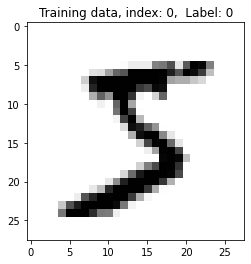

In [70]:
# Display the first (index 0) training image
display_digit(0)

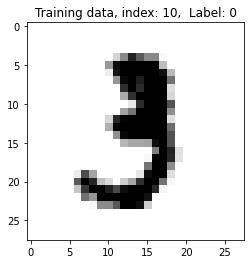

In [71]:
display_digit(10)

In [72]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [73]:
tmp = y_train
# print(tmp[0]) # 5
tmp = to_categorical(tmp, 10)
print(tmp[0]) # [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [74]:
#One Hot encoding of labels.

print(y_train.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)

(60000,)
(60000, 10)


In [75]:
# Define the neural network
def build_model():
    model = Sequential()

    model.add(Dense(512, input_shape=(784,)))    # why 512(??) # 784 = 28 x 28
    model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
    model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10))
    model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.
    return model

# Build the model
model = build_model()

In [76]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
# model.fit(X_train, y_train, batch_size=128, epochs=4, verbose=1, validation_data=(X_test, y_test)) # validation_test, optional
# score = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)  # type(socre), list # len(score), 2 # redundant info with validation_date part above

# print('Test score:', score[0])
# print('Test accuracy:', score[1])

# Epoch 1/4
# 469/469 [==============================] - 8s 17ms/step - loss: 0.2459 - accuracy: 0.9235 - val_loss: 0.1098 - val_accuracy: 0.9660
# Epoch 2/4
# 469/469 [==============================] - 8s 17ms/step - loss: 0.1037 - accuracy: 0.9677 - val_loss: 0.1091 - val_accuracy: 0.9668
# Epoch 3/4
# 469/469 [==============================] - 8s 17ms/step - loss: 0.0750 - accuracy: 0.9774 - val_loss: 0.0979 - val_accuracy: 0.9710
# Epoch 4/4
# 469/469 [==============================] - 8s 17ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0828 - val_accuracy: 0.9774
# 313/313 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9774

# Test score: 0.08279212564229965
# Test accuracy: 0.977400004863739

In [78]:
model.fit(X_train, y_train, batch_size=128, epochs=4, verbose=1) # validation_test, optional
score = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)  # type(socre), list # len(score), 2 # redundant info with validation_date part above

print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/4
469/469 [==============================] - 7s 16ms/step - loss: 0.2442 - accuracy: 0.9242
Epoch 2/4
469/469 [==============================] - 8s 16ms/step - loss: 0.1025 - accuracy: 0.9695
Epoch 3/4
469/469 [==============================] - 8s 16ms/step - loss: 0.0757 - accuracy: 0.9774
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9780
Test score: 0.08061722666025162
Test accuracy: 0.9779999852180481
